# Week 1 Exercise 1.1- Group 2
**s232161-Xiaoyu Yan 25%**\
**s Marcel Zelent 25%**\
**s Linna Li 25%**\
**s Nicolaus 25%**

In [679]:
import numpy as np
from activation import ActivationFunction
import matplotlib.pyplot as plt

### 1.1-1
The code below is about Sign Activation function. The gradient will not be defined for this activation function

In [680]:
class SignActivation(ActivationFunction):
    """ 
        Sign activation: `f(x) = 1 if x > 0, 0 if x <= 0`
    """
    def forward(self, x):
        """
         This is the output function.
         TODO: Define the correct return function, given input `x`
        """
        if x > 0:
            return 1
        else:
            return 0   
      
    def gradient(self, x):
        """
            Function derivative.
            Define the correct return value (derivative), given input `x`
        """
        return None


The code below is used to test the sign activation function and we can find that the answer is correct obviously.

In [681]:
## TODO Test your activation function
a = SignActivation()
print(a.forward(2))
print(a.forward(0))

1
0


### 1.1-2
The code below is about Perceptron. The initial weights are generated randomly by following Gaussion distribution with mean value as 0 and standard deviation as 1. Besides, we took -1 as bias. Function activation and output are two steps of generating the predict results and function prediction is the combination of them.

In [682]:
class Perceptron:
    """ 
      Perceptron neuron model
      Parameters
      ----------
      n_inputs : int
         Number of inputs
      act_f : Subclass of `ActivationFunction`
         Activation function
    """
    def __init__(self, n_inputs, act_f):
        """
         Perceptron class initialization
         TODO: Write the code to initialize weights and save the given activation function
        """
        if not isinstance(act_f, type) or not issubclass(act_f, ActivationFunction):
            raise TypeError('act_f has to be a subclass of ActivationFunction (not a class instance).')
        # weights
        self.w = np.random.normal(0, 1, (n_inputs+1,))
        # activation function
        self.f = act_f()
        

        if self.f is not None and not isinstance(self.f, ActivationFunction):
            raise TypeError("self.f should be a class instance.")

    def activation(self, x):
        """
         It computes the activation `a` given an input `x`
         TODO: Fill in the function to provide the correct output
         NB: Remember the bias
        """
        a = np.dot(self.w.T, x)
        return a

    def output(self, a):
        """
         It computes the neuron output `y`, given the activation `a`
         TODO: Fill in the function to provide the correct output
        """
        y = self.f.forward(a)
        return y

    def predict(self, x):
        """
         It computes the neuron output `y`, given the input `x`
         TODO: Fill in the function to provide the correct output
        """
        a = self.activation(x)
        y_out = self.output(a)
        return y_out

    def gradient(self, a):
        """
         It computes the gradient of the activation function, given the activation `a`
        """
        return self.f.gradient(a)

In [683]:
data = np.array( [ [0.5, 0.5, 0], [1.0, 0, 0], [2.0, 3.0, 0], [0, 1.0, 1], [0, 2.0, 1], [1.0, 2.2, 1] ] )
xdata = data[:,:2]
ydata = data[:,2]
print(xdata)
print(ydata)   

[[0.5 0.5]
 [1.  0. ]
 [2.  3. ]
 [0.  1. ]
 [0.  2. ]
 [1.  2.2]]
[0. 0. 0. 1. 1. 1.]


### 1.1-3
The code below is used to test the output of the initial Perceptron class. The correct answer shown above should be [0, 0, 0, 1, 1, 1]. For randomly given weights and bias, The answers for now are wrong.

In [693]:
## TODO Test perceptron initialization
xdata_shape = xdata.shape
xdata_train = np.append(np.ones((6,1)), xdata, axis=1)
print(xdata_train)
p = Perceptron(xdata_shape[1], SignActivation)
for i in range(6):
    print(p.predict(xdata_train[i,:]) )

[[1.  0.5 0.5]
 [1.  1.  0. ]
 [1.  2.  3. ]
 [1.  0.  1. ]
 [1.  0.  2. ]
 [1.  1.  2.2]]
1
0
0
1
1
1


Try to draw the decision line when the weights are random (no training performed)

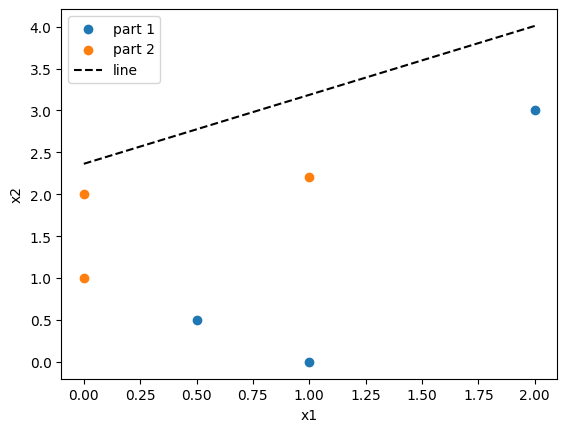

In [685]:
fig, ax = plt.subplots()
ax.scatter(xdata[0:3, 0], xdata[0:3, 1], label='part 1')
ax.scatter(xdata[3:6, 0], xdata[3:6, 1], label='part 2')
x=np.linspace(0, 2, 100)
y0 = -(p.w[1]/p.w[2])*x-p.w[0]/p.w[2]
ax.plot(x, y0, label='line', color='black', linestyle='--')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.show()

### 1.1-4
The code below is a function used for neurons to learn the correct weights. The weigth update equation is as below:
$$w_i(k+1)=w_i(k)+\eta(t_j-y_j)x_{ji}$$
From the equation we can find that when the predict answer is correct for all xdata, $(t_j-y_j)$ will be 0 and the weights will not change anymore.

In [686]:
def learning(w_new, perc, temp, xdata, ydata, lr):
    epoch = 0
    while True:
        temp = perc.w
        for i in range(6):
            w_new = perc.w + lr*(ydata[i] - perc.predict(xdata[i,:]))*xdata[i,:]
            perc.w = w_new
        epoch = epoch + 1
        if (w_new == temp).all() == True:
            print(epoch)
            print(perc.w)
            break

Take learning rate as 10e-3 as required first and the result is shown below.

In [687]:
lr = 10e-3
w_new = [0, 0]
temp = p.w
learning(w_new, p, temp, xdata_train, ydata, lr)
for i in range(6):
    print(p.predict(xdata_train[i,:]) )

71
[ 0.07405558 -0.24285925  0.09065369]
0
0
0
1
1
1


### 1.1-5
We try to give different learning rate to test the number of epoches. This classification problems is in two dimension which means we need to find a line to divide two parts of points. So if we choose some ridiculous initial weights will make the number of epoches larger. Since it is easy to find a line to classify those 6 points, larger learning rate and proper bias can spend less time to find the correct line. Obviously, the final weights are not same. Besides, the answers we predict are correct.

In [688]:
p1 = Perceptron(xdata_shape[1], SignActivation)
p2 = Perceptron(xdata_shape[1], SignActivation)
p3 = Perceptron(xdata_shape[1], SignActivation)
print(p1.w, p2.w, p3.w)
p2.w = p1.w.copy()
p3.w = p1.w.copy()
print(p1.w, p2.w, p3.w)

lr = 0.1
w_new = [0, 0]
temp = p1.w
learning(w_new, p1, temp, xdata_train, ydata, lr)
for i in range(6):
    print(p1.predict(xdata_train[i,:]) )

[-0.58556518 -0.81377369 -0.8686515 ] [-1.77900383  0.64573811  0.42467656] [ 0.7888072  -1.08197183  0.69925484]
[-0.58556518 -0.81377369 -0.8686515 ] [-0.58556518 -0.81377369 -0.8686515 ] [-0.58556518 -0.81377369 -0.8686515 ]
5
[ 0.01443482 -0.56377369  0.3413485 ]
0
0
0
1
1
1


In [689]:

lr = 0.01
w_new = [0, 0]
temp = p2.w
learning(w_new, p2, temp, xdata_train, ydata, lr)
for i in range(6):
    print(p2.predict(xdata_train[i,:]) )

27
[ 0.03443482 -0.55377369  0.2433485 ]
0
0
0
1
1
1


In [690]:
lr = 0.001
w_new = [0, 0]
temp = p3.w
learning(w_new, p3, temp, xdata_train, ydata, lr)
for i in range(6):
    print(p3.predict(xdata_train[i,:]) )

264
[ 0.03143482 -0.55077369  0.2379485 ]
0
0
0
1
1
1


### 1.1-6


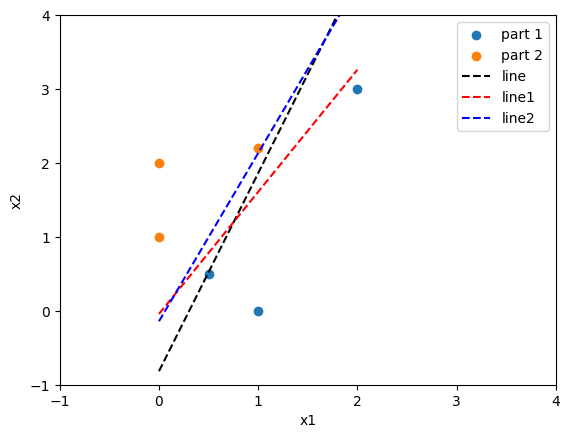

In [691]:
fig, ax = plt.subplots()
ax.scatter(xdata[0:3, 0], xdata[0:3, 1], label='part 1')
ax.scatter(xdata[3:6, 0], xdata[3:6, 1], label='part 2')
x=np.linspace(0, 2, 100)
y0 = -(p.w[1]/p.w[2])*x-p.w[0]/p.w[2]
y1 = -(p1.w[1]/p1.w[2])*x-p1.w[0]/p1.w[2]
y2 = -(p2.w[1]/p2.w[2])*x-p2.w[0]/p2.w[2]
ax.plot(x, y0, label='line', color='black', linestyle='--')
ax.plot(x, y1, label='line1', color='red', linestyle='--')
ax.plot(x, y2, label='line2', color='blue', linestyle='--')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.show()